## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

## Question 1:  Is the distribution of body temperatures normal?

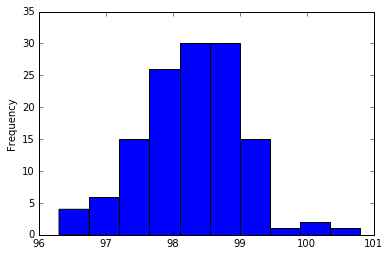

In [4]:
df.temperature.plot(kind="hist", ylim=(0,35));

The Distribution appears to be normal, but to be sure..

In [5]:
# Use scipy.stats to test for normality
stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

P-Value (0.26) is > 0.05, so we do NOT reject the null hypothesis of our distribution being normal.

## Question 2:  Is the true population mean really 98.6 degrees F?

In [44]:
# H0: The population mean (upop) is equal to 98.6 deg F.
# H1: The population mean is not equal to 98.6 deg F.

# Define the signficance level
alpha = 0.005

# Find some useful statistics of our sample body temperature data
n = len(df.temperature)         # sample size
sigma = df.temperature.std()    # standard deviation
mean = df.temperature.mean()      # mean

# For H0 to be true upop = usamp = 98.6 deg F, where usamp = sample mean of the sampling dist.
upop = 98.6
usamp = 98.6

# Estimate the standard deviation of the sampling distribution (a.k.a. standard error)
#    - when n is > 30 a z-distribution can be used
if n >= 30:     # "ok" to use a z-distribution
    sigma_sd = sigma / np.sqrt(n)  
else:          # need to use a t-distribution
    print "n is less than 30, please use a t-distribution and another program"

# Calculate a probability value (p-value) from the cumulative distribution function
p_value = stats.norm.cdf(mean, upop, sigma_sd)

# Compare the p_value to our significance level
if p_value < alpha:
    print 'P-value is ', p_value
    print 'P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F'
else:
    print 'P-value is ', p_value
    print 'P-value is >= significance level, so do not reject the null hypothesis. Average body temp is 98.6 deg F'

P-value is  2.45107850705e-08
P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F


## Question 3:  At what temperature should we consider someone's temperature to be "abnormal"?

Calculate a 95% confidence interval of the mean

In [22]:
ci = stats.norm.ppf(0.95, mean, sigma_sd) - 98.2

print 'confidence interval: ', mean - ci, 'to', mean + ci


confidence interval:  98.0942286467 to 98.4042328917


Calculate a margin of error for the mean

In [29]:
# Compute the Z score for 95% confidence
z = stats.norm.ppf(0.95)

# meanltiply the z score 95% by the standard error
margin_of_error = z * sigma_sd

print "margin of error: ", margin_of_error * 100, '%'


margin of error:  10.5771353265 %


In [31]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


## Question 4: Is there a significant difference between males and females in normal temperature?

In [66]:
# H0: There is no difference between the male and female body temperatures; u_male - u_female = 0
# H1: There is a difference between the male and female body temperatures; u_male - u_female != 0

# Define the signficance level
alpha = 0.005

# Define the male and female dataframes
dff = df[df.gender == 'F']
dfm = df[df.gender == 'M']

# Find some useful statistics of our sample male and female body temperature data
female_n = len(dff.temperature)         # female sample size
male_n = len(dfm.temperature)         # male sample size
female_sigma = dff.temperature.std()    # femalestandard deviation
male_sigma = dfm.temperature.std()    # malestandard deviation
female_mean = dff.temperature.mean()      # female mean
male_mean = dfm.temperature.mean()      # male mean

# Find the difference between the sample means
mean_sample_diff = female_mean - male_mean

# Find the standard deviation of the difference between the sample distributions
sigma_sd = np.sqrt((female_sigma ** 2 / female_n) + (male_sigma ** 2 / male_n))

# Find the p-value
p_value = 2 * stats.norm.cdf(0, mean_sample_diff, sigma_sd)

# Compare the p_value to our significance level
if p_value < alpha:
    print 'P-value is ', p_value
    print 'P-value < significance level, so reject the null hypothesis. Average body temp is not 98.6 deg F'
else:
    print 'P-value is ', p_value
    print 'P-value is >= significance level, so do not reject the null hypothesis. Average body temp is 98.6 deg F'

P-value is  0.0222873607607
P-value is >= significance level, so do not reject the null hypothesis. Average body temp is 98.6 deg F
